<h1 style="font-size: 40px; margin-bottom: 0px;">Week 3 Assignment</h1>

<hr style="margin-left: 0px; border: 0.25px solid; border-color: #000000; width: 600px;"></hr>

<p style="font-size: 32px; color: #FF0000;"><strong><u>KEY</u></strong></p>

<strong><u>Due: Saturday, September 21 at 11:59PM</u></strong>

<strong><u>Total points: 5 pts</u></strong>

<strong><u>To turn in your assignment:</u></strong>
<ol>
    <li>Complete assignment and make sure you have all the outputs requested for the notebook</li>
    <li>Go to your server's file directory and locate your completed notebook file</li>
    <li>Right click and select <strong>Download</strong> to download your completed notebook and <u>the PDF of your growth curve plot</u></li>
    <li>Navigate to lab class <u><strong><a href="https://drive.google.com/drive/folders/1Limmo19dvhZz3qIaDDSnuSrl44yTiHUd?usp=sharing" rel="noopener noreferrer" target="_blank">Google Drive</a></strong></u></li>
    <li>Find your individual folder in the <strong>Assignment Submission folder</strong></li>
    <li>Upload your completed notebook and <u>the PDF of your growth curve plot</u></li>
</ol>

<strong><u>How this assignment will be graded:</u></strong>

You will be graded on whether or not your output is correct. You will also be graded on if your code is able to run without errors. There can be more than one correct way to answer a question. If you find that you prefer to separate your answer for a single question into multiple code cells, feel free to do so.
<hr style="margin-left: 0px; border: 0.25px solid; border-color: #000000; width: 600px;"></hr>

<h2>Question 1</h2>

Ungraded

This question is ungraded and is here for you to get the needed data files for ChIP-seq analysis (and one genomics viewer program). There are multiple files, all of which are quite large, so it will take a bit of time to download it all and to get it uploaded to your DataHub server. Please have your data files ready by the time we start our ChIP-seq analysis.

This same information is also on our bCourses page "ChIP-seq data download information" if you don't want to have to keep coming back to DataHub to find the links.

We will be analyzing the raw ChIP-seq data from <a href="https://pubmed.ncbi.nlm.nih.gov/26258633/" rel="noopener noreferrer" target="_blank"><u>Zanconato et al 2015 Nat Cell Biol</u></a>, specifically looking at their TAZ (and control) datasets.

Please use the following links to find and download the sequencing files associated with this publication. There will be an option to download either as a FASTQ file or as a FASTA file. Please download the sequence files as a FASTQ file.

<h2>There are 5 replicates for their control (IgG) ChIP-seq,</br>
    but we will be analyzing just two of them:</h2>
<ul>
    <li><a href="https://trace.ncbi.nlm.nih.gov/Traces/?view=run_browser&acc=SRR1810912&display=download" rel="noopener noreferrer" target="_blank"><u>SRX883580</u></a> - contains 3 data files</li>
    <ul>
        <li>SRR1810912</li>
        <li>SRR1810913</li>
        <li>SRR1810914</li>
    </ul>
    <li><a href="https://trace.ncbi.nlm.nih.gov/Traces/?view=run_browser&acc=SRR1810925&display=download" rel="noopener noreferrer" target="_blank"><u>SRX883586</u></a> - contains 2 data files</li>
    <ul>
        <li>SRR1810925</li>
        <li>SRR1810926</li>
    </ul>
</ul>

<h2>There are two replicates for their TAZ ChIP-seq:</h2>
<ul>
    <li><a href="https://trace.ncbi.nlm.nih.gov/Traces/?view=run_browser&acc=SRR1810906&display=download" rel="noopener noreferrer" target="_blank"><u>SRX883578</u></a> - contains 3 data files</li>
    <ul>
        <li>SRR1810906</li>
        <li>SRR1810907</li>
        <li>SRR1810908</li>
    </ul>
    <li><a href="https://trace.ncbi.nlm.nih.gov/Traces/?view=run_browser&acc=SRR1810909&display=download" rel="noopener noreferrer" target="_blank"><u>SRX883579</u></a> - contains 3 data files</li>
    <ul>
        <li>SRR1810909</li>
        <li>SRR1810910</li>
        <li>SRR1810911</li>
    </ul>
</ul>

<h2>Download the Interactive Genomics Viewer (IGV)</h2>

<a href="https://www.broadinstitute.org/igv/" rel="noopener noreferrer" target="_blank"><u>You can find the download for IGV here.</u></a> The IGV was developed by the Broad Institute. On the left hand side of the page, there should be a Downloads link. Navigate to the Downloads page, and install IGV onto your computer. 

<h2>Question 2</h2>

2 pts

1 point for creating a working function. 1 point for making a dataframe and displaying the first five rows.

Set up a function that will output two arrays of data corresponding to the number of bacteria at time=t with the following parameters:
<ul>
    <li>starting population of bacteria: 10 bacteria</li>
    <li>rate of division:</li>
    <ul>
        <li>Boring old control bacteria: np.random.normal(0.2, 0.05) min<sup>-1</sup></li>
        <li>Super top-secret bacteria #562051: np.random.normal(0.5, 0.1) min<sup>-1</sup></li>
    </ul>
    <li>starting timepoint: 0 min</li>
    <li>final timepoint: 125 min</li>
    <li>time interval: 0.05 min</li>
    <li>Carrying capacity: 100,000 bacteria</li>
</ul>

Run your function to generate 6 control arrays and 6 top-secret arrays, and set up a DataFrame for your control bacteria, and a DataFrame for your top-secret bacteria. Output out a stylized table of <u>the first five rows</u> for your two DataFrames.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
#define our function to output two arrays - one for ctrl and one for top secret bac
def bacteria_run(ctrl_loc, ctrl_scale, secret_loc, secret_scale):
    #Initialize constants
    K = 100000
    t_max = 125
    dt = 0.05
    
    #Allow us to pass parameters to manipulate r
    r_ctrl = np.random.normal(ctrl_loc, ctrl_scale)
    r_secret= np.random.normal(secret_loc, secret_scale)
    
    #initialize output arrays and their initial value
    N_ctrl = np.zeros(int(t_max/dt))
    N_ctrl[0] = 10
    N_secret = np.zeros(int(t_max/dt))
    N_secret[0] = 10
    
    #set up our index
    position_list = np.arange(0, int(t_max/dt)-1, 1)

    #start up for loop - in one single for loop we can update both arrays
    for i in position_list:
        N_ctrl[i+1] = N_ctrl[i] + r_ctrl * dt * N_ctrl[i] * (1 - (N_ctrl[i]/K))
        N_secret[i+1] = N_secret[i] + r_secret * dt * N_secret[i] * (1- (N_secret[i]/K))

    #get both arrays that we generated back and we can unpack the output tuple to get each array
    return N_ctrl, N_secret


#create time_array
t_max = 125
dt = 0.05
time_array = np.zeros(int(t_max/dt))
position_list = np.arange(0, int(t_max/dt)-1, 1)
for i in position_list:
    time_array[i+1] = time_array[i] + dt

#create dataframes using time_array to start it up
control_df = pd.DataFrame(time_array)
secret_df = pd.DataFrame(time_array)

for runs in np.arange(1, 7, 1):
    ctrl, secret = bacteria_run(0.2, 0.05, 0.5, 0.1)
    control_df[runs] = ctrl
    secret_df[runs] = secret

In [3]:
control_df.head().style

,0,1,2,3,4,5,6
0,0.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
1,0.050000,10.083436,10.093900,10.082369,10.102286,10.075480,10.096973
2,0.100000,10.167568,10.188681,10.165416,10.205617,10.151529,10.194885
3,0.150000,10.252402,10.284352,10.249148,10.310006,10.228152,10.293748
4,0.200000,10.337944,10.380921,10.333568,10.415462,10.305354,10.393569


In [4]:
secret_df.head().style

,0,1,2,3,4,5,6
0,0.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
1,0.050000,10.265246,10.338770,10.273118,10.269017,10.262004,10.236992
2,0.100000,10.537528,10.689015,10.553694,10.545270,10.530872,10.479599
3,0.150000,10.817030,11.051124,10.841933,10.828954,10.806784,10.727956
4,0.200000,11.103946,11.425499,11.138043,11.120268,11.089924,10.982197


<h2>Question 3</h2>

2 pts

1 pt for creating plot. 1 pt for exporting plot as PDF (and submitting the PDF to Google Drive folder).

Using your datasets from Question 2, plot (on a linear y-axis) all the growth curves on a single plot. Make sure your plots include the following:
<ul>
    <li>Y-axis on a linear scale</li>
    <li>Legend</li>
    <li>Y-axis label</li>
    <li>X-axis label</li>
    <li>Y-axis and X-axis that starts from 0 at the bottom left corner</li>
    <li>Despined plot</li>
</ul>

Adjust the figure size and figure resolution to your liking, then export your plot as a PDF and upload your PDF file to your Assignment Submission folder.

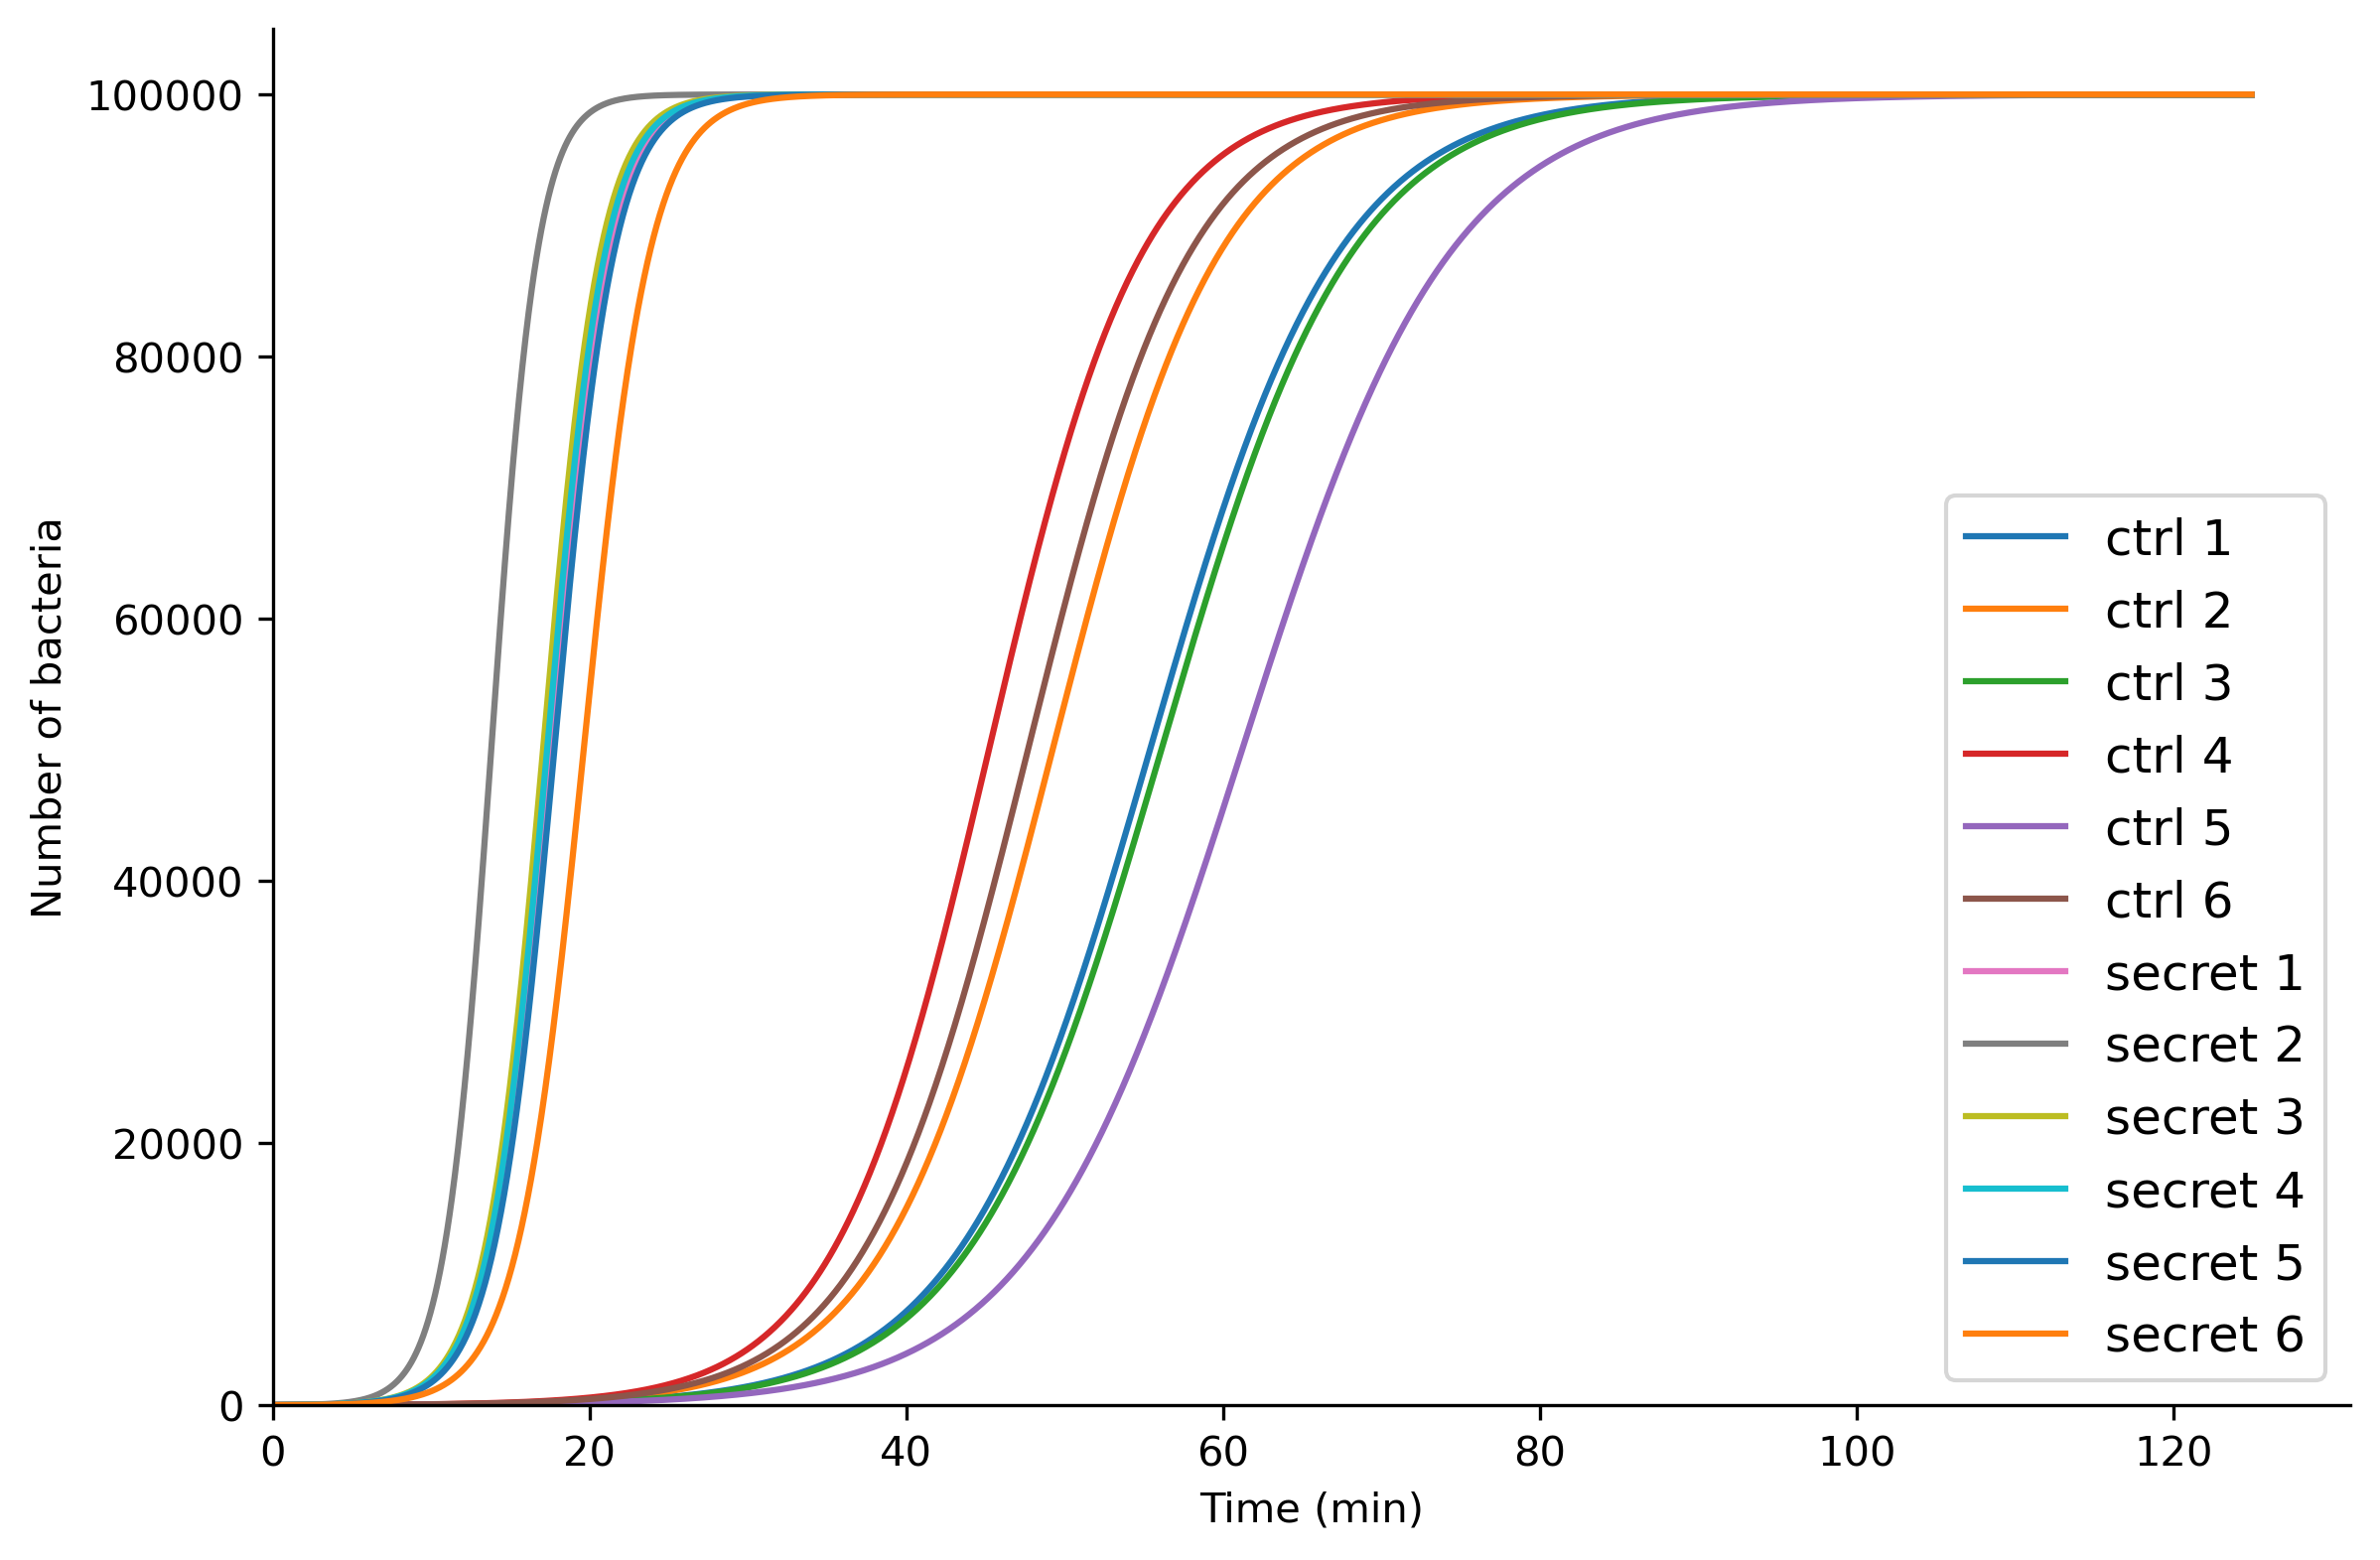

In [7]:
fig, ax = plt.subplots()
control_labels = ['ctrl 1', 'ctrl 2', 'ctrl 3', 'ctrl 4', 'ctrl 5', 'ctrl 6']
secret_labels = ['secret 1', 'secret 2', 'secret 3', 'secret 4', 'secret 5', 'secret 6']

for i in np.arange(1, 7, 1):
    plt.plot(control_df[0], control_df[i], label=control_labels[i-1])
for i in np.arange(1, 7, 1):
    plt.plot(secret_df[0], secret_df[i], label=secret_labels[i-1])

plt.legend(loc='lower right', fontsize=12)
plt.ylabel('Number of bacteria')
plt.xlabel('Time (min)')
plt.ylim(0)
plt.xlim(0)

sns.despine()

fig.set_size_inches(9, 6)
fig.set_dpi(300)
fig.savefig('Week_3_HW_plot.pdf', bbox_inches='tight')

<h2>Question 4</h2>

1pt

Calculate the mean number of bacteria at t=60 min for control bacteria and the super top-secret bacteria. Identify an appropriate statistical test to determine if there's a difference in the number of bacteria at t=60min between your control and top-secret groups.

In [6]:
import math
#find t=60 and use as a guide to pull data
pulled_array = np.zeros(len(time_array))
for t in position_list:
    pulled_array[t] = math.isclose(control_df.loc[t, 0], 60)

control_t60 = control_df.loc[(pulled_array == True), 1:].to_numpy().flatten()
secret_t60 = secret_df.loc[(pulled_array == True), 1:].to_numpy().flatten()

print('Mean of ctrl at t=60:', control_t60.mean())
print('Mean of secret at t=60:', secret_t60.mean())

comparison = stats.ttest_ind(control_t60, secret_t60, equal_var=False)
if comparison.pvalue < 0.05:
    print('There is a significant difference between control and secret at t=60min', comparison.pvalue)
else:
    print('There is no significant difference at t=60min', comparison.pvalue)

Mean of ctrl at t=60: 75802.67291210206
Mean of secret at t=60: 99999.99992710668
There is a significant difference between control and secret at t=60min 0.02801909664814862
